In [5]:
#特征提取与softmax的回归
#使得特征提取过程能够学习
from autogluon.tabular import TabularDataset,TabularPredictor
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from matplotlib import pyplot as plt
import seaborn as sns
import gzip


In [6]:
Ad=pd.read_csv("D:/Data/2022_3_data/train/train_data_ads.csv")
#feed=pd.read_csv("D:/Data/2022_3_data/train/train_data_ads.csv")
Ad_test=pd.read_csv("D:/Data/2022_3_data/test/test_data_ads.csv")

In [8]:
Ad.columns

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

In [9]:
Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675517 entries, 0 to 7675516
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   log_id                int64  
 1   label                 int64  
 2   user_id               int64  
 3   age                   int64  
 4   gender                int64  
 5   residence             int64  
 6   city                  int64  
 7   city_rank             int64  
 8   series_dev            int64  
 9   series_group          int64  
 10  emui_dev              int64  
 11  device_name           int64  
 12  device_size           int64  
 13  net_type              int64  
 14  task_id               int64  
 15  adv_id                int64  
 16  creat_type_cd         int64  
 17  adv_prim_id           int64  
 18  inter_type_cd         int64  
 19  slot_id               int64  
 20  site_id               int64  
 21  spread_app_id         int64  
 22  hispace_app_tags      int64  
 23  app_sec

In [10]:
X = Ad.loc[:, ~Ad.columns.isin(['label'])]
y = Ad.label


In [12]:
Ad.shape

(7675517, 35)

Sample CTR : 0.01552156030662169


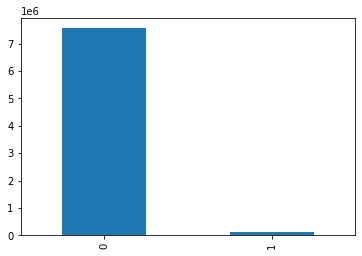

In [11]:
Ad.label.value_counts().plot(kind='bar')
print("Sample CTR :", y.sum()/len(y))

In [13]:
for i in Ad.columns:
    print(i,':\n','unique num: ',Ad[i].nunique(),'\n total num: ',Ad[i].count())
    print(Ad[i].value_counts()/len(X),'\n')

log_id :
 unique num:  1176633 
 total num:  7675517
373250     9.119907e-07
68533      9.119907e-07
68631      9.119907e-07
68571      9.119907e-07
68481      9.119907e-07
               ...     
1176505    1.302844e-07
1176502    1.302844e-07
1176500    1.302844e-07
1176498    1.302844e-07
1176385    1.302844e-07
Name: log_id, Length: 1176633, dtype: float64 

label :
 unique num:  2 
 total num:  7675517
0    0.984478
1    0.015522
Name: label, dtype: float64 

user_id :
 unique num:  65297 
 total num:  7675517
200204    4.903904e-04
131435    3.916349e-04
141586    3.375668e-04
106049    3.310526e-04
234826    3.169819e-04
              ...     
185919    1.302844e-07
140193    1.302844e-07
218094    1.302844e-07
169903    1.302844e-07
265674    1.302844e-07
Name: user_id, Length: 65297, dtype: float64 

age :
 unique num:  8 
 total num:  7675517
8    0.211386
7    0.201288
3    0.190323
2    0.123245
6    0.118895
5    0.114315
4    0.022630
9    0.017917
Name: age, dtype: float

Distribution of age : 8
8    0.211386
7    0.201288
3    0.190323
2    0.123245
6    0.118895
5    0.114315
4    0.022630
9    0.017917
Name: age, dtype: float64 

Distribution of gender : 3
2    0.774693
4    0.153593
3    0.071713
Name: gender, dtype: float64 

Distribution of city_rank : 4
2    0.416135
5    0.285256
4    0.156388
3    0.142220
Name: city_rank, dtype: float64 

Distribution of series_group : 7
3    0.279031
5    0.196647
2    0.133363
6    0.116881
7    0.107431
8    0.098536
4    0.068110
Name: series_group, dtype: float64 

Distribution of net_type : 6
7    0.726128
6    0.120398
4    0.113608
3    0.039433
5    0.000266
2    0.000167
Name: net_type, dtype: float64 

Distribution of creat_type_cd : 9
8     0.543599
10    0.273570
5     0.063583
3     0.047229
7     0.036423
2     0.019919
4     0.010027
6     0.003586
9     0.002063
Name: creat_type_cd, dtype: float64 

Distribution of inter_type_cd : 4
4    0.525632
5    0.358464
3    0.115891
2    0.000014
Name:

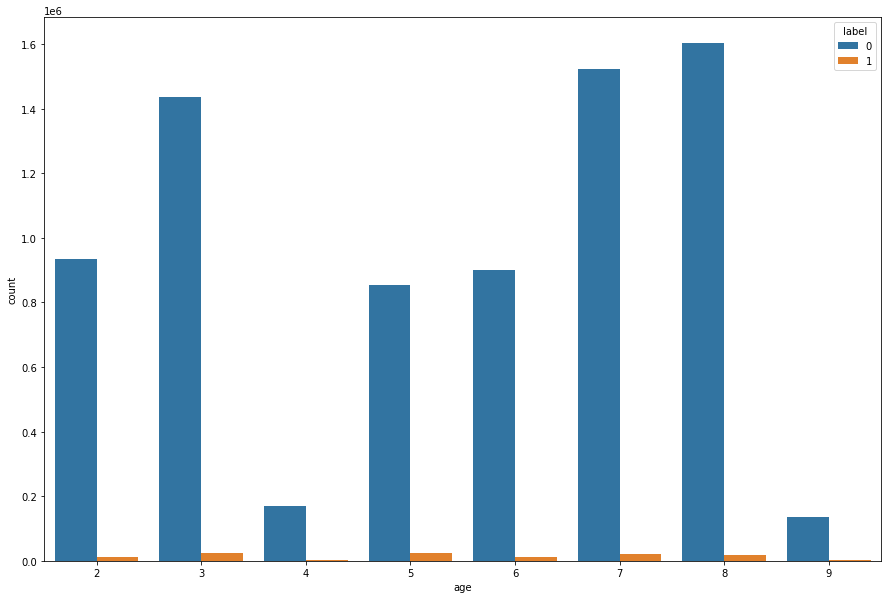

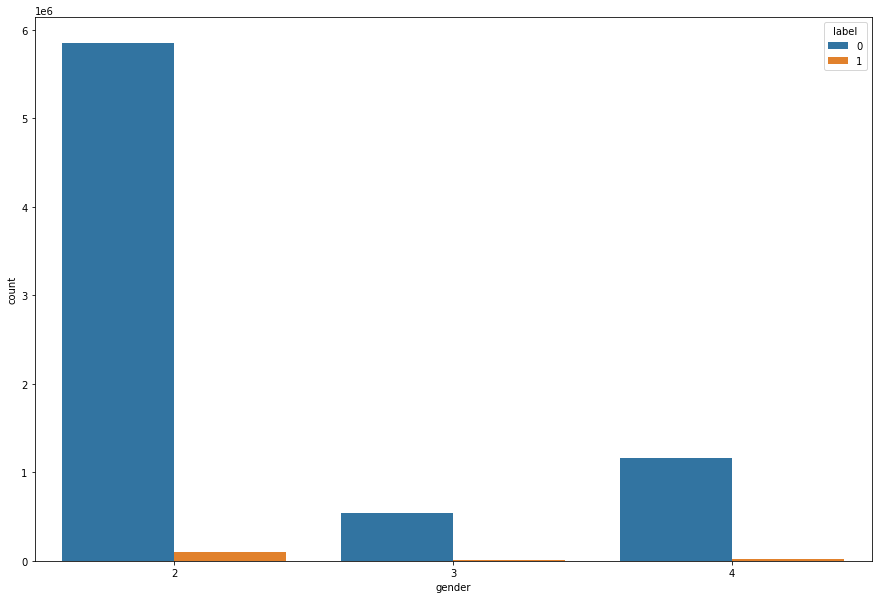

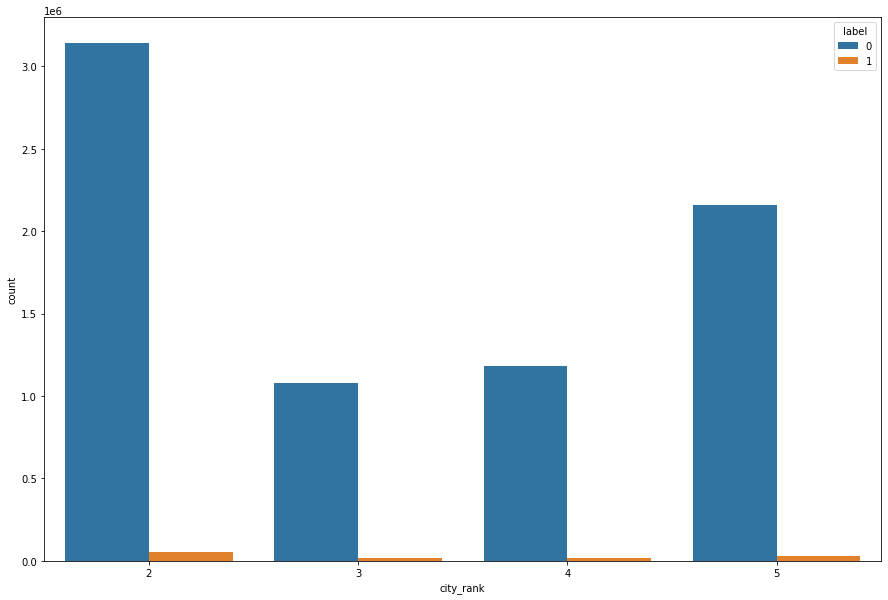

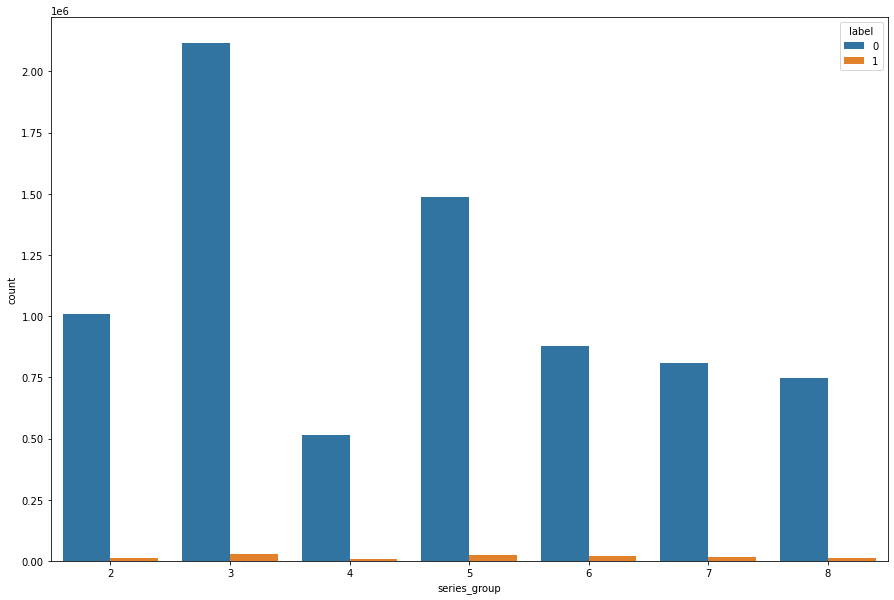

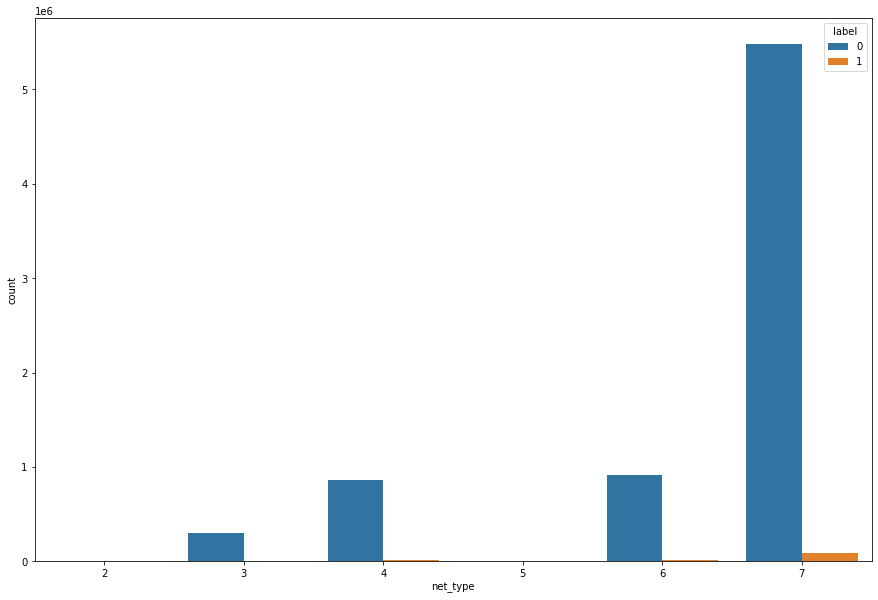

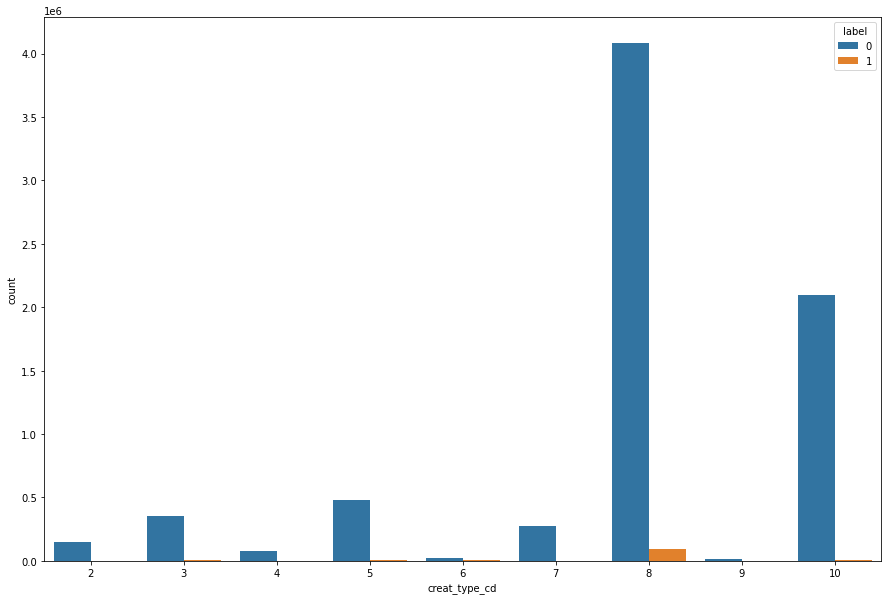

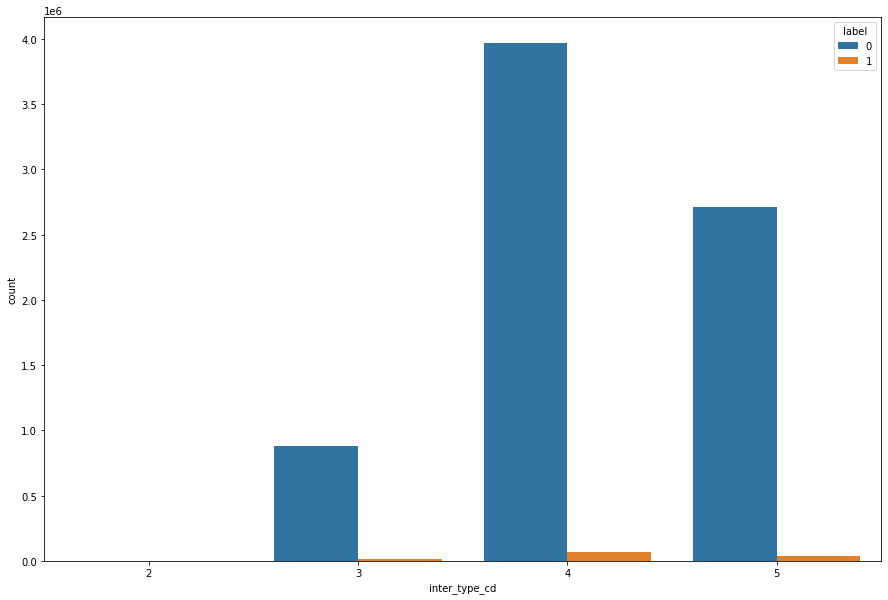

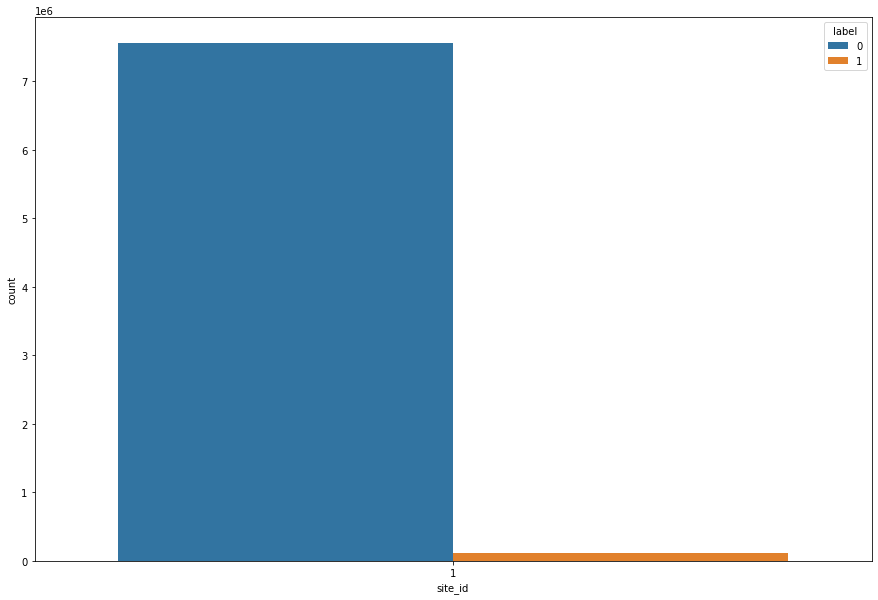

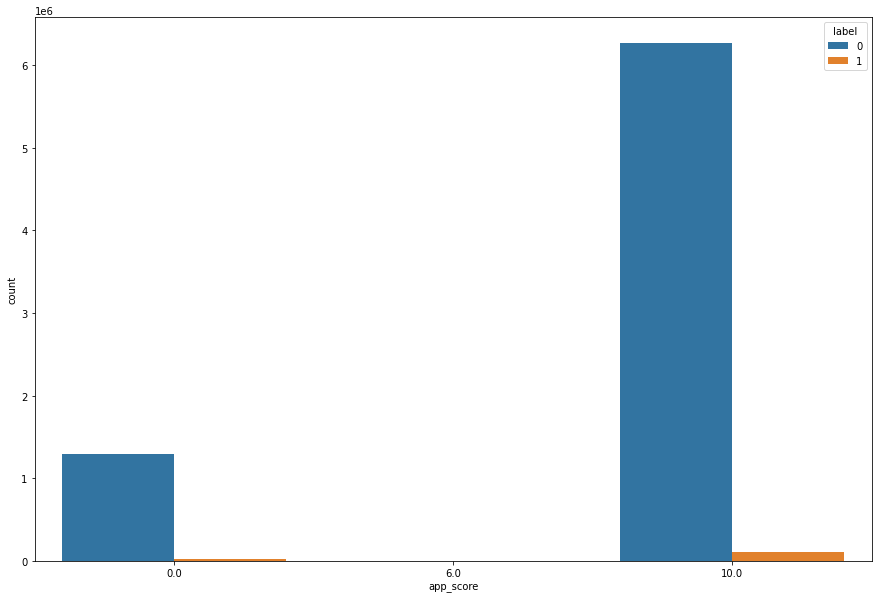

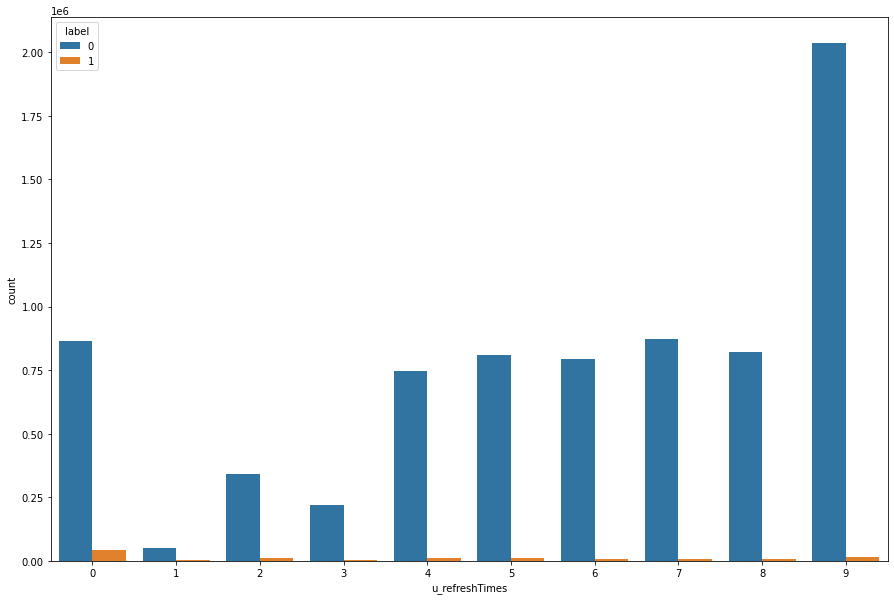

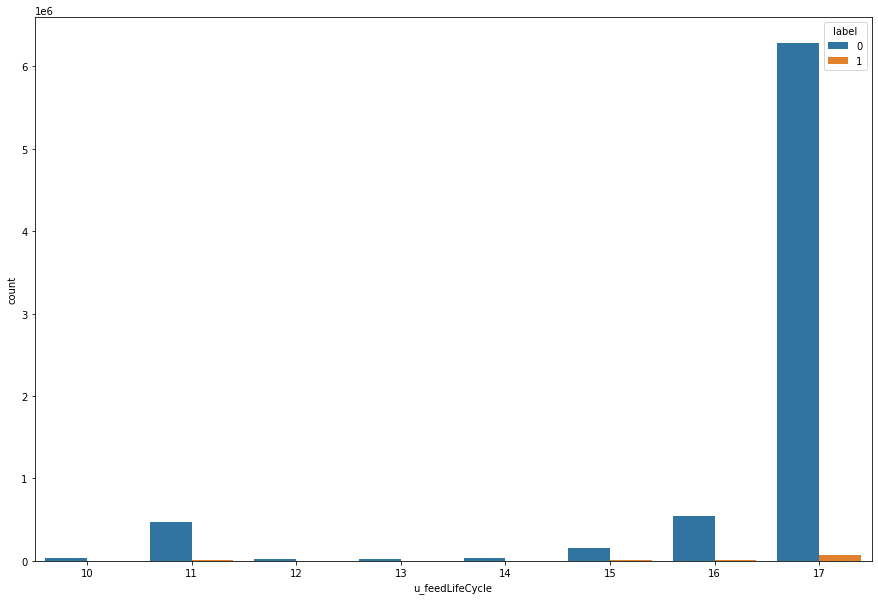

In [18]:
ff=[]
def field_plot():
    for i in X.columns:
        if Ad[i].nunique() < 20:
            ff.append(i)
    for f in ff:
        print(f'Distribution of {f} :', X[f].nunique())
        print(X[f].value_counts()/len(X),'\n')
        plt.figure(figsize=(15,10))
        sns.countplot(x=f,hue='label',data=Ad)
 


field_plot()   

In [9]:
numeric_X = Ad.select_dtypes(include=['int', 'float'])
print(numeric_X.columns.tolist())

['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name', 'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id', 'hispace_app_tags', 'app_second_class', 'app_score', 'pt_d', 'u_refreshTimes', 'u_feedLifeCycle']


In [21]:
print(Ad.isnull().sum(axis = 0))

log_id                  0
label                   0
user_id                 0
age                     0
gender                  0
residence               0
city                    0
city_rank               0
series_dev              0
series_group            0
emui_dev                0
device_name             0
device_size             0
net_type                0
task_id                 0
adv_id                  0
creat_type_cd           0
adv_prim_id             0
inter_type_cd           0
slot_id                 0
site_id                 0
spread_app_id           0
hispace_app_tags        0
app_second_class        0
app_score               0
ad_click_list_v001      0
ad_click_list_v002      0
ad_click_list_v003      0
ad_close_list_v001      0
ad_close_list_v002      0
ad_close_list_v003      0
pt_d                    0
u_newsCatInterestsST    0
u_refreshTimes          0
u_feedLifeCycle         0
dtype: int64


In [23]:
numeric_X

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,pt_d,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,...,4,46,1,162,47,14,10.0,202206030326,0,15
1,373253,1,100005,3,2,16,147,2,32,6,...,4,37,1,344,20,13,10.0,202206030326,0,15
2,373252,1,100005,3,2,16,147,2,32,6,...,4,37,1,344,20,13,10.0,202206030326,0,15
3,373251,0,100005,3,2,16,147,2,32,6,...,4,47,1,152,49,17,10.0,202206030326,0,15
4,373255,0,100005,3,2,16,147,2,32,6,...,4,44,1,312,43,18,10.0,202206030328,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675512,650508,0,287180,6,4,33,319,3,27,2,...,3,65,1,213,18,23,0.0,202206090848,7,17
7675513,650492,0,287180,6,4,33,319,3,27,2,...,4,16,1,152,49,17,10.0,202206090848,7,17
7675514,650509,0,287180,6,4,33,319,3,27,2,...,3,22,1,213,18,23,0.0,202206091012,7,17
7675515,650491,1,287180,6,4,33,319,3,27,2,...,5,65,1,190,47,14,10.0,202206091119,7,17


In [10]:
metric = 'roc_auc'
train_data=TabularDataset(numeric_X)b 
id,label='log_id','label'
predictor=TabularPredictor(label=label,eval_metric=metric).fit(train_data.drop(columns=[id,'user_id'][:2000]))

No path specified. Models will be saved in: "AutogluonModels/ag-20220728_033338\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220728_033338\"
AutoGluon Version:  0.5.1
Python Version:     3.8.13
Operating System:   Windows
Train Data Rows:    7675517
Train Data Columns: 25
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess t

In [ ]:
#test
preds=predictor.predict_prob(Ad_test.drop(columns=[id,'user_id']))
submission=pd.DataFrame({id:Ad_test[id],label:preds})
submission.to_csv('D:/Data/2022_3_data/submission/submission.CSV',index=False)

In [11]:
preds=predictor.predict_prob(numeric_X[2000:2500].drop(columns=[id,'user_id']))
submission=pd.DataFrame({id:Ad_test[id],label:preds})
submission.to_csv('D:/Data/2022_3_data/submission/submission.CSV',index=False)

AttributeError: 'TabularPredictor' object has no attribute 'predict_prob'

In [ ]:
#安装相关依赖库 如果是windows系统，cmd命令框中输入pip安装，参考上述环境配置
#!pip install sklearn
#!pip install pandas

#---------------------------------------------------
#导入库
import pandas as pd

#----------------数据探索----------------
# 只使用目标域用户行为数据
train_ads = pd.read_csv('./train/train_data_ads.csv',
    usecols=['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'device_name',
            'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd'])

test_ads = pd.read_csv('./test/test_data_ads.csv',
    usecols=['log_id', 'user_id', 'age', 'gender', 'residence', 'device_name',
    'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd'])
    
# 数据集采样  
train_ads = pd.concat([
    train_ads[train_ads['label'] == 0].sample(70000),
    train_ads[train_ads['label'] == 1].sample(10000),
])


#----------------模型训练----------------
# 加载训练逻辑回归模型
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(
    train_ads.drop(['log_id', 'label', 'user_id'], axis=1),
    train_ads['label']
)


#----------------结果输出----------------
# 模型预测与生成结果文件
test_ads['pctr'] = clf.predict_proba(
    test_ads.drop(['log_id', 'user_id'], axis=1),
)[:, 1]
test_ads[['log_id', 'pctr']].to_csv('submission.csv',index=None)